In [40]:
import matplotlib
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
#need to write a function that draws a line across blueline
#another function for the red and yellow
#another function for where lines cross

In [41]:
def findredline(img):
    """This function takes in a image and using a pre-saved
    blueline template to match then returns a rectangle
    """
    redline_template =cv2.imread('/Users/rrj/Documents/School/Computer Vision/Data/redline_template.png')
    c,w, h = redline_template.shape[::-1]
    #Apply template Matching
    res = cv2.matchTemplate(img,redline_template,4)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print('redline confidence match=', max_val)
    top_left = max_loc
    leftcorner=(top_left[0], top_left[1] - 41)
    bottom_right = (top_left[0] + w, top_left[1] + h)
    return cv2.rectangle(img,leftcorner, bottom_right, 255, 2)

In [42]:
def NZDot(img): #not working.. going to play with color
    """This function takes in a image and using a pre-saved
    blueline template to match then returns a rectangle
    """
    NZDot_template =cv2.imread('/Users/rrj/Documents/School/Computer Vision/Data/neutralzonedot_template.png')
    c,w, h = NZDot_template.shape[::-1]
    #Apply template Matching
    res = cv2.matchTemplate(img,NZDot_template,4)
    #plt.imshow(res)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print('NZDot_template confidence match=', max_val)
    top_left = max_loc
    leftcorner=(top_left[0], top_left[1] - 41)
    bottom_right = (top_left[0] + w, top_left[1] + h)
    return cv2.rectangle(img,leftcorner, bottom_right, 255, 2)

In [43]:
def blueline_contours(img):
    """
    Takes in an image and returns a contour structure object...
    I will pair this with a line to determine points on the image
    """
    # Convert BGR to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask= mask)
    
    gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
    ret,th1 = cv2.threshold(gray,130,255,cv2.THRESH_BINARY)
    kernel = np.ones((10,10),np.uint8)
    kernel1 = np.ones((5,5),np.uint8)
    
    opening = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel)
    opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel1)
    contours, hierarchy = cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    return contours

In [57]:
def yellowBoard_contours(img):
    """this detects the yellow board surounding the rink
    returns contours of yellow boards"""
    # Convert BGR to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_yellow = np.array([10,100,100])
    upper_yellow = np.array([35,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask= mask)
    
    gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
    ret,th1 = cv2.threshold(gray,130,255,cv2.THRESH_BINARY)
    
    #set kernel to this to have a complete blob across for yellow blob
    kernel = np.ones((15,25),np.uint8)
    kernel1 = np.ones((3,3),np.uint8)
    
    closing = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel1)
    
    [contours, hierarchy] = cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    return contours

In [45]:
def redTrack(img):
    """detects center red line"""
        # Convert BGR to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_red = np.array([170,30,30])
    upper_red = np.array([185,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask= mask)
    return res

In [58]:
def bluelinefinder(img):
    """locates the blue line using yellow boards and blueline detctor, returns x and y vlaues"""
    Ycontours=yellowBoard_contours(img)
    var=0
    for j in range(len(Ycontours)):
        s=Ycontours[j].shape[0]
        a=Ycontours[j].reshape(s,2)
        tempMaxX=max(a[:,0])
        tempMinX=min(a[:,0])
        if(tempMaxX-tempMinX>var):
            var=tempMaxX-tempMinX
            maxind=np.argmax(a[:,0])
            minind=np.argmin(a[:,0])
            right=a[maxind,:]
            left=a[minind,:]

    Bcontours=blueline_contours(img)
    maxY=0
    minY=1000
    for j in range(len(Bcontours)):
        s=Bcontours[j].shape[0]
        a=Bcontours[j].reshape(s,2)
        tempMaxY=max(a[:,1])
        tempMinY=min(a[:,1])
        if(tempMaxY>maxY):
            maxY=tempMaxY
            maxind=np.argmax(a[:,1])
            bottom=a[maxind,:]
        if(tempMinY<minY):
            minY=tempMinY
            minind=np.argmin(a[:,1])
            top=a[minind,:]

    figure(num=None, figsize=(17, 12), dpi=80, facecolor='w', edgecolor='k');
    #plt.imshow(img[...,::-1]);
    #plot the blueline points
    #plt.plot(top[0],top[1],'go')
    #plt.plot(bottom[0], bottom[1],'go')
    #plot the yellow board points
    #plt.plot(right[0],right[1],'go',color='red')
    #plt.plot(left[0], left[1],'go',color='red')
    #shared x_axis
    x_axis=np.linspace(0,1400,100)
    #plot blueline line
    try:
        Bx=[top[0],bottom[0]]
        By=[top[1],bottom[1]]
    except:
        return [0,0]
    Bcoeff=np.polyfit(Bx,By,1)
    Bpolynomial=np.poly1d(Bcoeff)
    By_axis=Bpolynomial(x_axis)
    #plt.imshow(img[...,::-1]);
    #plt.plot(x_axis,By_axis)
    #plot yelllow board line
    Yx=[right[0],left[0]]
    Yy=[right[1],left[1]]
    Ycoeff=np.polyfit(Yx,Yy,1)
    Ypolynomial=np.poly1d(Ycoeff)
    Yy_axis=Ypolynomial(x_axis)
    #plt.plot(x_axis,Yy_axis)

    idx = np.argwhere(np.diff(np.sign(By_axis - Yy_axis))).flatten()
    plt.plot(x_axis[idx], Yy_axis[idx], 'ro')
    return [x_axis[idx],Yy_axis[idx]]

In [47]:
def yellowline_polyfit(img):
    """REturns the fit line through the yellow boards"""
    Ycontours=yellowBoard_contours(img)
    var=0
    for j in range(len(Ycontours)):
        s=Ycontours[j].shape[0]
        a=Ycontours[j].reshape(s,2)
        tempMaxX=max(a[:,0])
        tempMinX=min(a[:,0])
        if(tempMaxX-tempMinX>var):
            var=tempMaxX-tempMinX
            maxind=np.argmax(a[:,0])
            minind=np.argmin(a[:,0])
            right=a[maxind,:]
            left=a[minind,:]

#     figure(num=None, figsize=(17, 12), dpi=80, facecolor='w', edgecolor='k');
#     plt.imshow(img[...,::-1]);
#     plt.plot(right[0],right[1],'go',color='red')
#     plt.plot(left[0], left[1],'go',color='red')
    Yx=[right[0],left[0]]
    Yy=[right[1],left[1]]
    Ycoeff=np.polyfit(Yx,Yy,1)
    Ypolynomial=np.poly1d(Ycoeff)
    x_axis=np.linspace(0,1275,100)
    Yy_axis=Ypolynomial(x_axis)
#     test=Ypolynomial(x+220)
#     print(test)
    Yy_axis_100=Ypolynomial(x_axis)-55
#     plt.plot(x_axis,Yy_axis_100)
#     plt.plot(x_axis,Yy_axis)
#     plt.show()
    return Ypolynomial

In [48]:
#used for drawing line across blue line, used larges y value and smallest y value for points to draw line
def bluelines_slope(img):
    """returns the slope of the blue line that is detected"""
    Bcontours=blueline_contours(img)
    maxY=0
    minY=1000
    for j in range(len(Bcontours)):
        s=Bcontours[j].shape[0]
        a=Bcontours[j].reshape(s,2)
        tempMaxY=max(a[:,1])
        tempMinY=min(a[:,1])
        if(tempMaxY>maxY):
            maxY=tempMaxY
            maxind=np.argmax(a[:,1])
            bottom=a[maxind,:]
        if(tempMinY<minY):
            minY=tempMinY
            minind=np.argmin(a[:,1])
            top=a[minind,:]

#     figure(num=None, figsize=(17, 12), dpi=80, facecolor='w', edgecolor='k');
#     plt.imshow(img[...,::-1]);
#     plt.plot(top[0],top[1],'go')
#     plt.plot(bottom[0], bottom[1],'go')
    try:
        Bx=[top[0],bottom[0]]
        By=[top[1],bottom[1]]
        Bcoeff=np.polyfit(Bx,By,1)
    except:
        return 0
    Bpolynomial=np.poly1d(Bcoeff)
    x_axis=np.linspace(0,1400,100)
    By_axis=Bpolynomial(x_axis)
#     plt.plot(x_axis,By_axis)
#     plt.show()
    return Bcoeff[0]

In [49]:
def findblueline(img):
    """This function takes in a image and using a pre-saved
    blueline template to match then returns a rectangle
    """
    blueline_template =cv2.imread('/Users/rrj/Documents/School/Computer Vision/Data/blueline_template.png')
    c,w, h = blueline_template.shape[::-1]
    #Apply template Matching
    res = cv2.matchTemplate(img,blueline_template,4)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print('blueline confidence match=', max_val)
    top_left = max_loc
    leftcorner=(top_left[0], top_left[1] - 41)
    bottom_right = (top_left[0] + w, top_left[1] + h)
    return cv2.rectangle(img,leftcorner, bottom_right, 255, 2)

In [50]:
def findredline(img):
    """This function takes in a image and using a pre-saved
    blueline template to match then returns a rectangle
    """
    blueline_template =cv2.imread('/Users/rrj/Documents/School/Computer Vision/Data/redline_template.png')
    c,w, h = blueline_template.shape[::-1]
    #Apply template Matching
    res = cv2.matchTemplate(img,blueline_template,4)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print('blueline confidence match=', max_val)
    top_left = max_loc
    leftcorner=(top_left[0], top_left[1] - 41)
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,leftcorner, bottom_right, 255, 2)
    return int((top_left[0]+w+top_left[0])/2),int((top_left[1] + h+top_left[1])/2)

In [63]:
def template_match(template_file, inx):
    """searches for a template in a certain index"""
    blueline_template =cv2.imread(template_file)
    c,w, h = blueline_template.shape[::-1]
    #Apply template Matching
    res = cv2.matchTemplate(img,blueline_template,4)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print('Template {} Match value='.format(inx), max_val)
    top_left = max_loc
    leftcorner=(top_left[0], top_left[1] - 11)
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.putText(img,
            'Index ='.format(inx), 
            (500,600), 
            cv2.FONT_HERSHEY_SIMPLEX, 
            1,
            (200,50,50),
            2)
    cv2.rectangle(img,leftcorner, bottom_right, 255, 2) 
    return int((top_left[0]+w+top_left[0])/2),int((top_left[1] + h + top_left[1])/2)

In [64]:
def L_R_C(x):
    """used to determine if the next template should be serached for,
    input is x value of the template, and returns L for left, R for right or C for center"""
    if(x <300):
        return "L"
    if(x>300 and x<1000):
        return "C"
    if(x>900):
        return "R"

Working
Still working
14995
real slope= 0
Template 12 Match value= 85501352.0
14996
real slope= 0
Template 12 Match value= 85425640.0
14997
real slope= 0
Template 12 Match value= 85304920.0
14998
real slope= 0
Template 12 Match value= 85489088.0
14999
real slope= 0
Template 12 Match value= 85378360.0


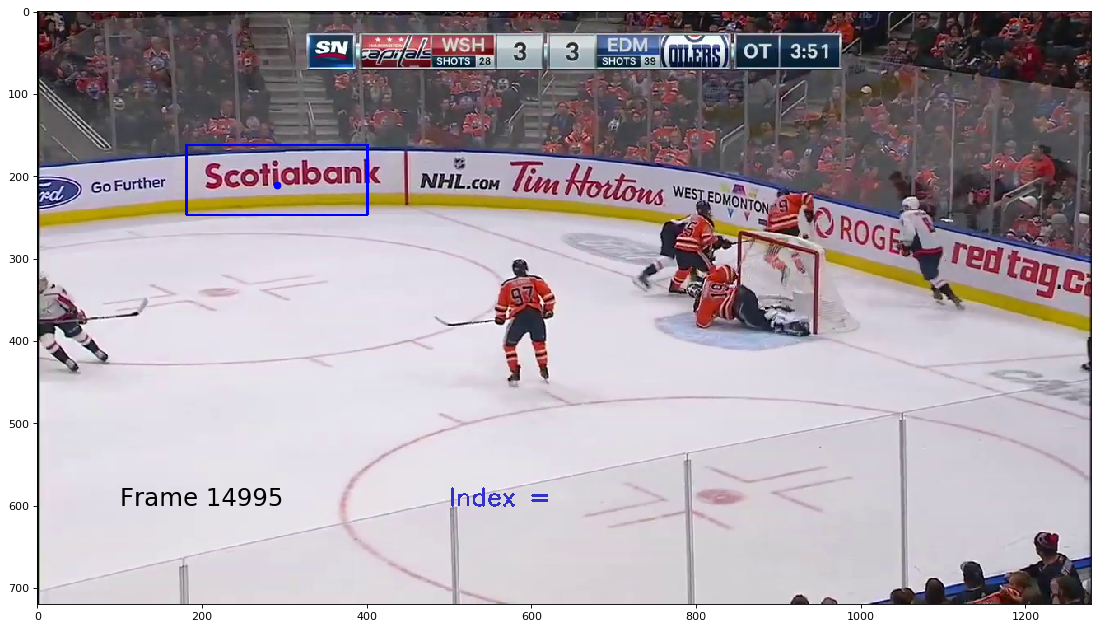

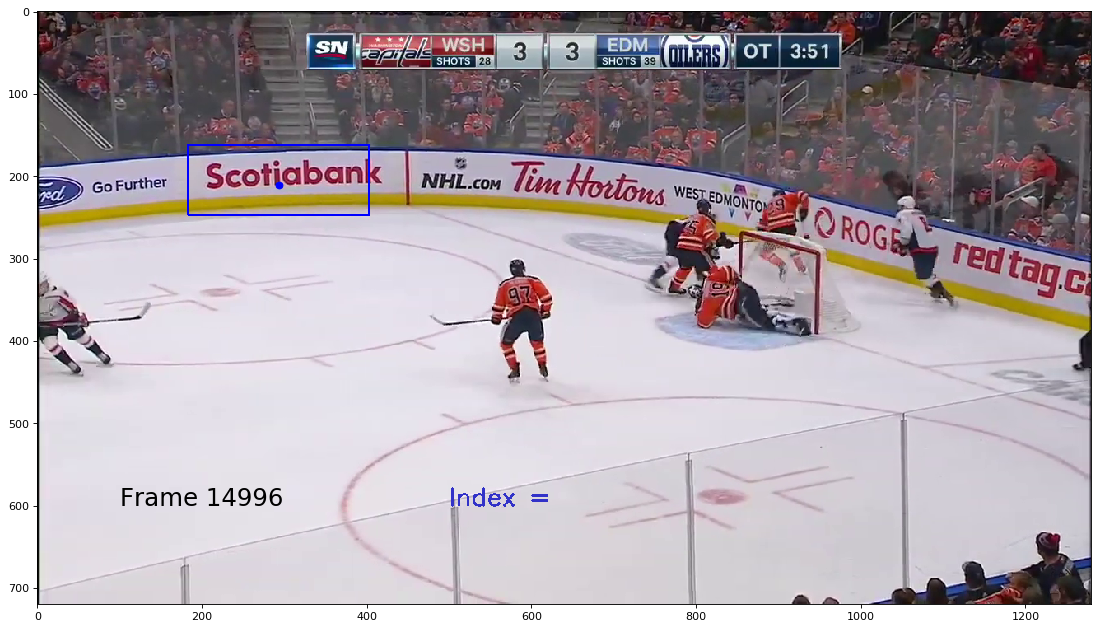

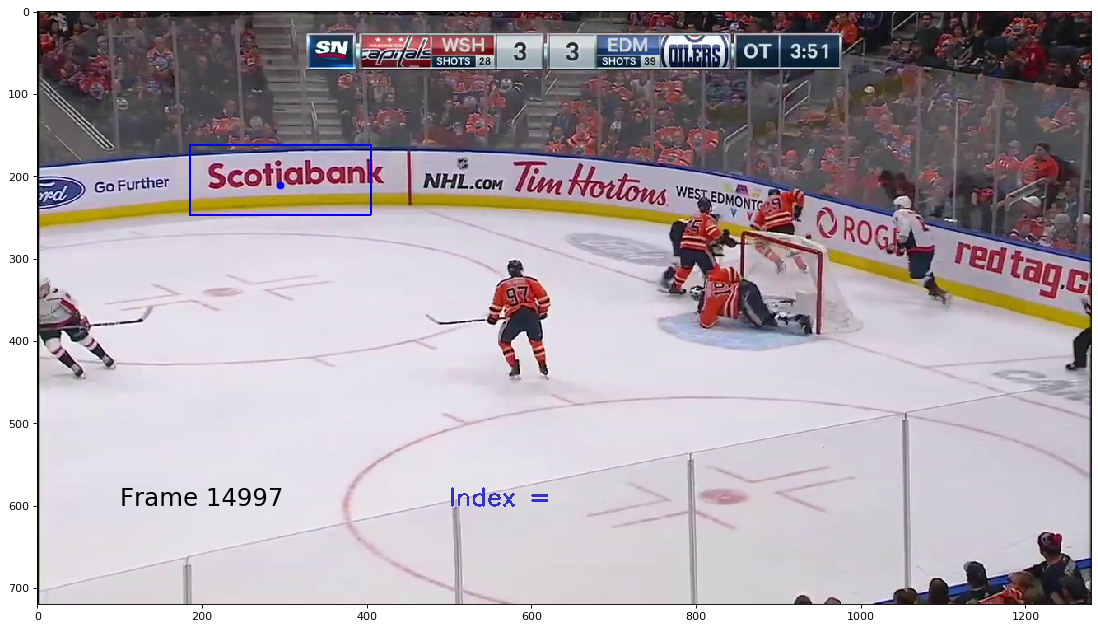

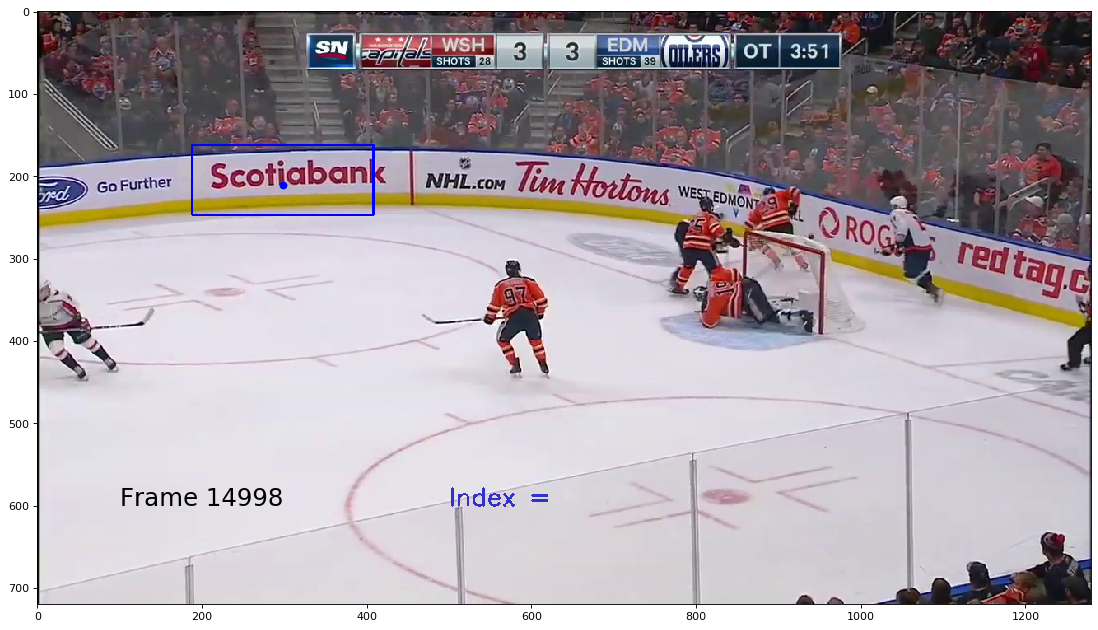

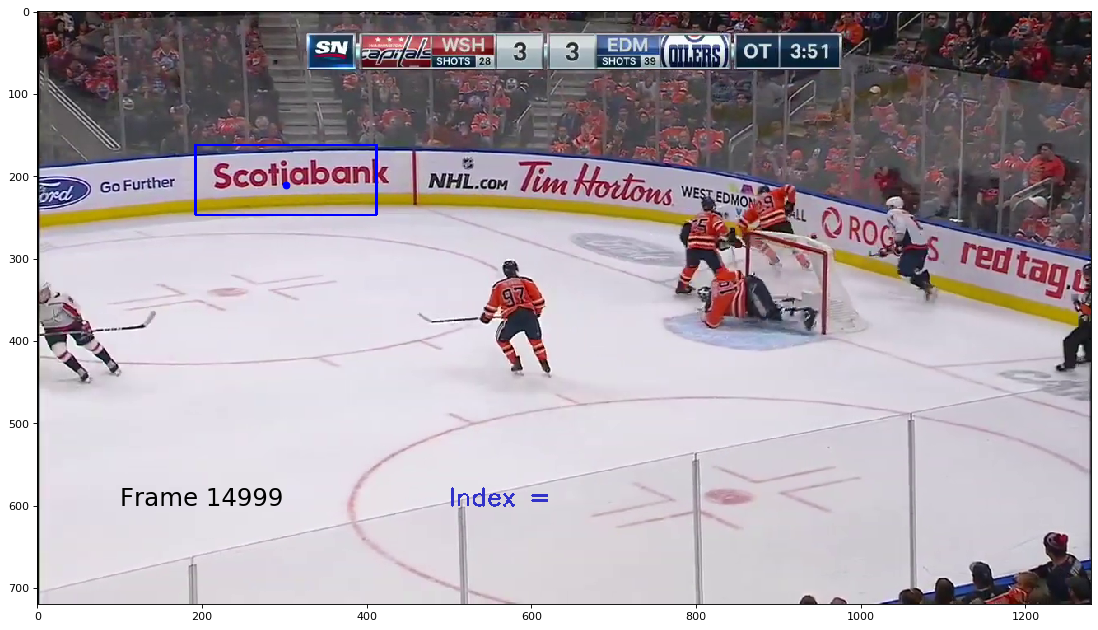

In [65]:

print('Working')
cap = cv2.VideoCapture('/Users/rrj/Documents/School/Computer Vision/Capitals @ Oilers 10_24_19 Highlights.mp4') #video_name is the video being called
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
print('Still working')
#frames 480-600 opening play
#frames 605-870 1st play  692 and on not locating blueline

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
#out = cv2.VideoWriter('location_from_template.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30, (frame_width,frame_height))

#used to simulated sections and sets from where the video was
last_search=False
F_O=False
template_cap=False
switch=0
slope=0
x=0
multi=0
check=1  #used for checking if can capture another template
left_inx=4 #set to -1 becasue all left templates have been captured

#the index of the value then the value of the x-value
FL=False
FR=False
inx=12

#captured templates
right_inx=12 #set to 12 becasue all right templates have been captured
templates={}
templates[1]="/Users/rrj/Documents/School/Computer Vision/Data/left_blueline_1.png"
templates[2]="/Users/rrj/Documents/School/Computer Vision/Data/left_blueline_2.png"
templates[3]="/Users/rrj/Documents/School/Computer Vision/Data/left_blueline_3.png"
templates[4]="/Users/rrj/Documents/School/Computer Vision/Data/left_blueline_4.png"
templates[5]='/Users/rrj/Documents/School/Computer Vision/Data/left_blueline_template.png'
templates[6]='/Users/rrj/Documents/School/Computer Vision/Data/redline_template.png'
templates[7]='/Users/rrj/Documents/School/Computer Vision/Data/right_blueline_template.png'
templates[8]="/Users/rrj/Documents/School/Computer Vision/Data/right_blueline_8.png"
templates[9]="/Users/rrj/Documents/School/Computer Vision/Data/right_blueline_9.png"
templates[10]="/Users/rrj/Documents/School/Computer Vision/Data/right_blueline_10.png"
templates[11]="/Users/rrj/Documents/School/Computer Vision/Data/right_blueline_11.png"
templates[12]= '/Users/rrj/Documents/School/Computer Vision/Data/right_blueline_12.png'


for i in range(14995,15000): #start of rush going left, start at 14995 to 15179
#for i in range(7860,7940): #used for left templates
#for i in range(510,511): #used for templates right of blue
    print(i)
    cap.set(1,i); # Where frame_no is the frame you want
    ret, img = cap.read() # Read the frame
    
    #if blue line slope is positive then it is on the right side of the ice
#     slope=bluelines_slope(img)
    #x,y=bluelinefinder(img)
    print("real slope=", slope)
    if(slope>1.8):
        slope=-1
        x=xprev
    #print("slope=",slope)
    xprev=x
    
    #creates templates to the right of the right blueline. 4 templates
    if(slope>0 and switch==1):
        space=int((1280-x)/220)
        print("space=",space)
        print("slope is positive")
        b_location=x+10
        for j in range(right_inx,space+right_inx):
            if(right_inx>=12):
                break
            print("j=",j)
            polyfit=yellowline_polyfit(img)
            mask = np.zeros(img.shape, dtype=np.uint8)
            s=55
            ad_size=220
            UL=(b_location,polyfit(b_location)-s)
            UR=(b_location+ad_size,polyfit(b_location+ad_size)-s)
            LR=(b_location+ad_size, polyfit(b_location+ad_size))
            LL=(b_location,polyfit(b_location))

            roi_corners = np.array([[UL, UR, LR, LL]], dtype=np.int32)
            # fill the ROI so it doesn't get wiped out when the mask is applied
            channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
            ignore_mask_color = (255,)*channel_count
            cv2.fillPoly(mask, roi_corners, ignore_mask_color)
            # from Masterfool: use cv2.fillConvexPoly if you know it's convex

            # apply the mask
            masked_image = cv2.bitwise_and(img, mask)
            ad=masked_image[int(UR[1]):int(LL[1]),int(b_location):int(b_location)+ad_size]
            cv2.imwrite('/Users/rrj/Documents/School/Computer Vision/Data/right_blueline_{}.png'.format(right_inx), ad)
            templates[right_inx]='/Users/rrj/Documents/School/Computer Vision/Data/right_blueline_{}.png'.format(right_inx)
            b_location=b_location+220
            right_inx=right_inx+1
    #creates templates left of the blueline
    if(slope<0 and switch==1):
        print("x=",x)
        space=int(x/280)
        print("space=",space)
        print("slope is negative")
        b_location=x+10
        
        if(check==space):
            for j in range(left_inx, left_inx-1,-1):
                print("j=",j)
                if(left_inx<=-1):
                    break
                
                polyfit=yellowline_polyfit(img)
                mask = np.zeros(img.shape, dtype=np.uint8)
                s=60
                a=5
                ad_size=-280
                b_location=b_location+ad_size*multi
                UL=(b_location,polyfit(b_location)-s)
                UR=(b_location+ad_size,polyfit(b_location+ad_size)-s)
                LR=(b_location+ad_size, polyfit(b_location+ad_size)+a)
                LL=(b_location,polyfit(b_location)+a)
                print("UR=",UR)
                print("LL=",LL)
                roi_corners = np.array([[UL, UR, LR, LL]], dtype=np.int32)
                # fill the ROI so it doesn't get wiped out when the mask is applied
                channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
                ignore_mask_color = (255,)*channel_count
                cv2.fillPoly(mask, roi_corners, ignore_mask_color)
                # from Masterfool: use cv2.fillConvexPoly if you know it's convex

                # apply the mask
                masked_image = cv2.bitwise_and(img, mask)
                ad=masked_image[int(UR[1]):int(LL[1]),int(b_location)+ad_size:int(b_location)]
                figure(num=j, figsize=(17, 12), dpi=80, facecolor='w', edgecolor='k');
                plt.imshow(masked_image[...,::-1]);
                cv2.imwrite('/Users/rrj/Documents/School/Computer Vision/Data/left_blueline_{}.png'.format(left_inx), ad)
                templates[left_inx]='/Users/rrj/Documents/School/Computer Vision/Data/left_blueline_{}.png'.format(left_inx)
                cv2.rectangle(img,UR, LL, 255, 2)
                left_inx=left_inx-1
                check=check+1
                multi=multi+1
                template_cap=True
    #template_file='/Users/rrj/Documents/School/Computer Vision/Data/right_blueline_11.png'
    #Cx, Cy= template_match(template_file)
    #a,b=findredline(img)
    #print("redline is at=",a)
    #contours=blueline_contours(img)
    #img_contours = cv2.drawContours(img, contours, -1, (0,255,0), 3)
    figure(num=i, figsize=(17, 12), dpi=80, facecolor='w', edgecolor='k');
    #plt.plot(a,b, 'ro', color='blue')
    #plt.plot(x, y, 'ro')
    #template_match(img, 10)
    
    #started to get left, center, right. need to take all possible states for
    #the system then uses the template to determine which direction the camera is facing
    if(last_search):
        Lx , Ly = template_match(templates[1], 1)
        #cv2.rectangle(img,(Lx-25,Ly-50), (Lx+25,Ly+50), 255, 2)
        plt.plot(Lx, Ly, 'ro', color="blue")
    if(F_O):
        Rx , Ry = template_match(templates[6], 6)
        plt.plot(Rx, Ry, 'ro', color="blue")
        #cv2.rectangle(img,(Rx-25,Ry-50), (Rx+25,Ry+50), 255, 2)
        if(Rx>800):
            F_O=False
            inx=3
    if((inx ==10 or inx==3) and Tx>800):
        slope=bluelines_slope(img)
        x,y=bluelinefinder(img)
        plt.plot(x, y, 'ro', color="red")
        try:
            cv2.rectangle(img,(x-25,y-50), (x+25,y+50), 255, 2)
        except:
            print("broken")
        if(x>850 and inx== 10):
            F_O=True
        if(x>1000 and inx==3):
            last_search=True
    else:
        Tx , Ty = template_match(templates[inx], inx)
        #cv2.rectangle(img,(Tx-25,Ty-50), (Tx+25,Ty+50), 255, 2)
        plt.plot(Tx, Ty, 'ro', color="blue")
        temp = L_R_C(Tx)
    #     print("temp=", temp)
    #     print("FR =", FR)
    #     print("FL =", FL)
    #     print("logic=",(temp==R and FR==False and FL==False))
        if(inx==12 and temp=="C"):
            FR=False

        if(inx==1 and temp=="C"):
            FL=False

        if(inx==12 and temp=="L"):
            FR = True

        if(inx==1 and temp=="R"):
            FL=True

        if(temp=="L" and FR==False and FL==False):
            inx=inx+1
            FR=False
            FL=False

        if(temp=="R" and FR==False and FL==False):
            print("lowering index")
            inx=inx-1
            FR=False
            FL=False

        if(temp=="C" and FR==False and FL==False):
            inx=inx
            FR=False
            FL=False
        
    
    
    plt.imshow(img[...,::-1]); #used for plotting
    
    
    
    #add text onto the images for write files
    cv2.putText(img,
                'Frame {}'.format(i), 
                (100,600), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                1,
                (200,50,50),
                2)
    plt.text(100, 600, 'Frame {}'.format(i), fontsize=22)
    if(template_cap):
        for k in range(20):
            cv2.putText(img,
                'Template {} captured'.format(left_inx+1), 
                (UR[0], ((LL[1]+UR[1])/2)+75), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                1,
                (50,50,200),
                2)
            plt.text(UR[0], ((LL[1]+UR[1])/2)+75, 'Template {} captured'.format(left_inx+1), fontsize=22)
            template_cap=False
            #out.write(img) #used for recording    

    

    
    #out.write(img) #used for recording
    
    #plt.text(Cx-100, Cy-80, "Center Anchor", fontsize=22, color='red')
    #plt.imshow(opening, cmap='gray',vmin=0, vmax=255)
    #figure(num=2, figsize=(17, 12), dpi=80, facecolor='w', edgecolor='k');
    #plt.imshow(img_contours[...,::-1])
    #plt.imshow(opening, cmap='gray',vmin=0, vmax=255)
#     plt.show()
    #print('contours',contours)
    #print('hierarchy', hierarchy)
    
#cap.release() #used for recording video
#out.release() #used for recording video
    #save templates
    #matplotlib.image.imsave('/Users/rrj/Documents/School/Computer Vision/Data/hockey.png', img)

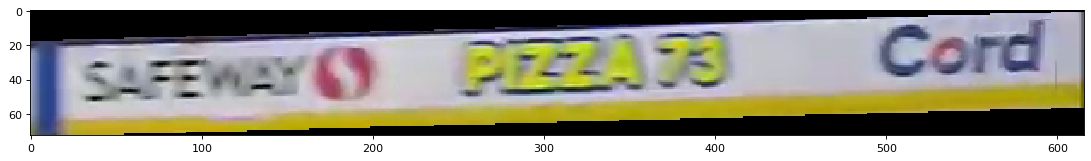

In [49]:
# original image
# -1 loads as-is so if it will be 3 or 4 channel as the original
# mask defaulting to black for 3-channel and transparent for 4-channel
# (of course replace corners with yours)

polyfit=yellowline_polyfit(img)
mask = np.zeros(img.shape, dtype=np.uint8)
s=55
ad_size=220+220+220
UL=(x,polyfit(x)-s)
UR=(x+ad_size,polyfit(x+ad_size)-s)
LR=(x+ad_size, polyfit(x+ad_size))
LL=(x,polyfit(x))

roi_corners = np.array([[UL, UR, LR, LL]], dtype=np.int32)
# fill the ROI so it doesn't get wiped out when the mask is applied
channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
ignore_mask_color = (255,)*channel_count
cv2.fillPoly(mask, roi_corners, ignore_mask_color)
# from Masterfool: use cv2.fillConvexPoly if you know it's convex

# apply the mask
masked_image = cv2.bitwise_and(img, mask)
safeway=masked_image[int(UR[1]):int(LL[1]),int(x):int(x)+ad_size]
figure(num=i, figsize=(17, 12), dpi=80, facecolor='w', edgecolor='k');
plt.imshow(safeway[...,::-1])

In [39]:
int(UR[1])

115

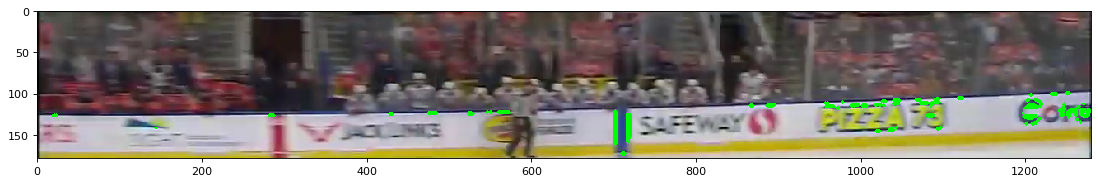

In [15]:
import math

a=max(Yy_axis)
crop_img = img[0:int(a), 0:1350]

hsv = cv2.cvtColor(crop_img, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(crop_img,crop_img, mask= mask)

gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
ret,th1 = cv2.threshold(gray,130,255,cv2.THRESH_BINARY)
kernel = np.ones((1,1),np.uint8)
kernel1 = np.ones((2,2),np.uint8)

#closing = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel)
#opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
#opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel1)
bcontours, hierarchy = cv2.findContours(th1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#bcontours=blueline_contours(crop_img)
figure(num=i, figsize=(17, 12), dpi=80, facecolor='w', edgecolor='k');
img_contours = cv2.drawContours(crop_img, bcontours, -1, (0,255,0), 3)
plt.imshow(crop_img[...,::-1]);



plt.show()

In [ ]:
    
    #template matching below
    #findblueline(img)
    #findredline(img)
    #NZDot(img)
    
    #color tracking below
    #res=blueTrack(img)
    #res=yellowTrack(img)
    #res = redTrack(img)  
    
    #gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
    #ret,th1 = cv2.threshold(gray,130,255,cv2.THRESH_BINARY)
    
    #set kernel to this to have a complete blob across for yellow blob
    #kernel = np.ones((15,25),np.uint8)
    #kernel1 = np.ones((3,3),np.uint8)
    
    # Elliptical Kernel
    #kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
    # Cross-shaped Kernel
    #kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(10,5))
    
    #dilation = cv2.dilate(th1,kernel,iterations = 1)
    #closing = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel)
    #opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel1)
    
    
    #contours, hierarchy = cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    #contours=yellowBoard_contours(img)